In [ ]:
#lnu.me@northeasterne.edu

# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('hackathon.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:

# Create dummy variables for 2 columns
df_job = pd.get_dummies(df['job'])
df_marital = pd.get_dummies(df['marital'])
df_poutcome = pd.get_dummies(df['poutcome'])

#Concat new columns to original dataframe 
df = pd.concat([df, df_job, df_marital,df_poutcome], axis=1)
print (df.head())

   age           job  marital  education  ... failure  other success unknown
0   58    management  married   tertiary  ...       0      0       0       1
1   44    technician   single  secondary  ...       0      0       0       1
2   33  entrepreneur  married  secondary  ...       0      0       0       1
3   47   blue-collar  married    unknown  ...       0      0       0       1
4   33       unknown   single    unknown  ...       0      0       0       1

[5 rows x 36 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45211 non-null  int64 
 1   job            45211 non-null  object
 2   marital        45211 non-null  object
 3   education      45211 non-null  object
 4   default        45211 non-null  object
 5   balance        45211 non-null  int64 
 6   housing        45211 non-null  object
 7   loan           45211 non-null  object
 8   contact        45211 non-null  object
 9   day            45211 non-null  int64 
 10  month          45211 non-null  object
 11  duration       45211 non-null  int64 
 12  campaign       45211 non-null  int64 
 13  pdays          45211 non-null  int64 
 14  previous       45211 non-null  int64 
 15  poutcome       45211 non-null  object
 16  y              45211 non-null  object
 17  admin.         45211 non-null  uint8 
 18  blue-collar    45211 non-n

In [ ]:
df_target = df['y']
df_indep = df.drop('y',axis=1)

In [ ]:
dt = pd.concat([df_indep, df_target], axis=1)


In [ ]:
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,no


In [ ]:
dt = dt.drop(['default'],axis=1)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
dt = dt.drop(['job', 'marital','poutcome','age','education','housing','loan','contact','month','previous'], axis=1)

In [ ]:
x = dt.iloc[:,:-1]
y = dt.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =0)

In [ ]:
type(x_train)


pandas.core.frame.DataFrame

In [ ]:
# x_tr = x_train[['day','housemaid','self-employed','technician','unknown']]

In [ ]:
# Training Logistic Regression Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
# classifier.fit(x_tr,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the Test set results
# x_tst = x_test[['day','housemaid','self-employed','technician','unknown']]

y_pred = classifier.predict(x_test)
# y_pred = classifier.predict(x_tst)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [ ]:

# # Making the Confusion Matrix

# from sklearn.metrics import confusion_matrix, accuracy_score

# cm = confusion_matrix(y_test, y_pred)

# print(cm)

# accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [ ]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7737  243]
 [ 667  396]]


0.8993696782041358

<Figure size 576x576 with 0 Axes>

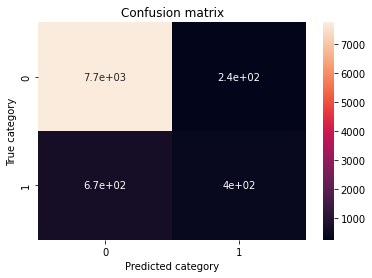

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cm, ax=ax, annot=True) #normalize='all'
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18)
    
    
}

In [ ]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, x_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, x_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, x_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, x_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, x_train, y_train, cv=3)
rand_mean = rand_scores.mean()




# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Support vector', 'K- Nearest', 'Decision Tree', 'Grad Boosting', 'Rand FC'], 
    'Accuracy Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean]}

result_df = pd.DataFrame(data=d)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
result_df = result_df.sort_values(by=['Accuracy Scores'], ascending=False)
result_df

,Classifiers,Accuracy Scores
4,Grad Boosting,0.903146
0,Logistic Reg.,0.895184
5,Rand FC,0.894492
1,Support vector,0.883212
2,K- Nearest,0.881332
3,Decision Tree,0.850282
